<a href="https://colab.research.google.com/github/Joaosantos3/Data-Science/blob/main/DATA-SCIENCE-FINANCAS-CARTEIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAÇÃO DE BBT

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ! pip install pycryptodome pycryptodomex
# !pip uninstall crypto
# !pip uninstall pycrypto
# !pip install pycryptodome
!pip uninstall --yes pandas-datareader
!pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316
!pip install yfinance


!pip uninstall crypto
!pip uninstall pycrypto
!pip install pycryptodome
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

import pandas as pd
from pandas_datareader import data as wb

!pip install xlsxwriter
import xlsxwriter

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'

Found existing installation: pandas-datareader 0+untagged.811.gea66d6b
Uninstalling pandas-datareader-0+untagged.811.gea66d6b:
  Successfully uninstalled pandas-datareader-0+untagged.811.gea66d6b
  Cloning https://github.com/raphi6/pandas-datareader.git (to revision ea66d6b981554f9d0262038aef2106dda7138316) to /tmp/pip-req-build-_42z439o
  Running command git clone --filter=blob:none --quiet https://github.com/raphi6/pandas-datareader.git /tmp/pip-req-build-_42z439o
  Running command git rev-parse -q --verify 'sha^ea66d6b981554f9d0262038aef2106dda7138316'
  Running command git fetch -q https://github.com/raphi6/pandas-datareader.git ea66d6b981554f9d0262038aef2106dda7138316
  Running command git checkout -q ea66d6b981554f9d0262038aef2106dda7138316
  Resolved https://github.com/raphi6/pandas-datareader.git to commit ea66d6b981554f9d0262038aef2106dda7138316
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-datareader: filename=pandas_datareader-0+untagged.811.gea66d6b-py

# ESCOLHA DE CARTEIRA, DATA

In [18]:
start_date=input("Data:")

Data:2021-01-01


In [19]:
from datetime import datetime
end=datetime.now().strftime('%Y-%m-%d')
print(start_date)
print(end)
days = np.busday_count(start_date, end)
days

2021-01-01
2023-07-13


659

In [59]:
carteira=['TASA4.SA','ABEV3.SA','WEGE3.SA','^BVSP']

In [60]:
d = {name: pd.DataFrame() for name in carteira}

In [61]:
for df_name in list(d.keys()):
  # d[df_name]=wb.DataReader(df_name,data_source='yahoo',start=start_date)
  d[df_name] = pdr.get_data_yahoo(df_name,start=start_date,end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, '^BVSP')

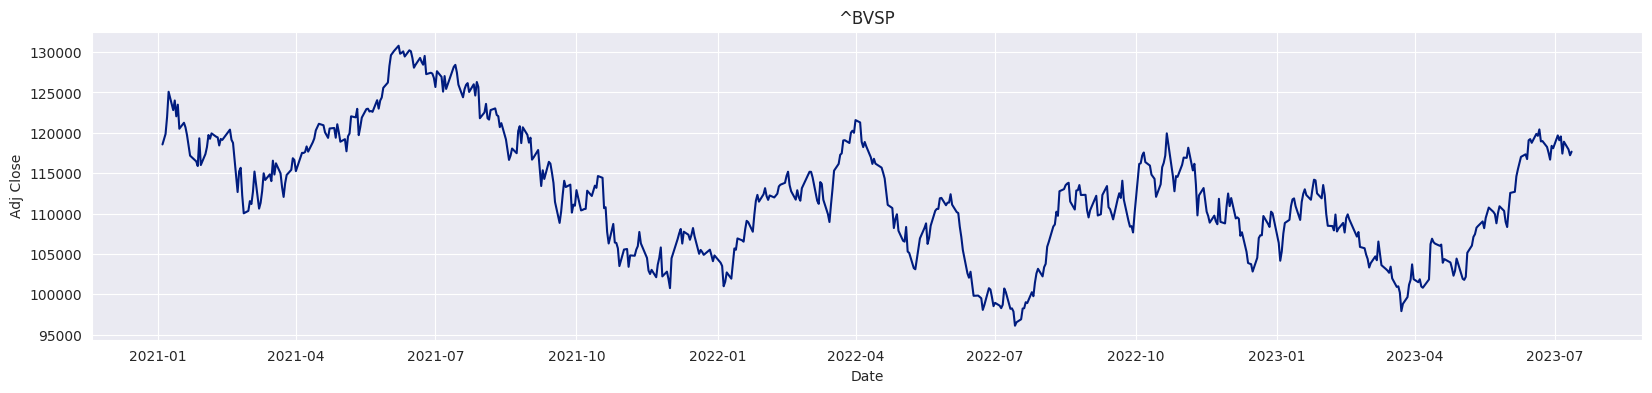

In [62]:
name='^BVSP'#"BDRX.SA" #"^GSPC"
sns.set_palette('dark')
sns.set_style(style='darkgrid')
fig1,ax1=plt.subplots(figsize=(20,4))
ax1=sns.lineplot(data=d[name],y='Adj Close',x=d[name].index)
ax1.set_title(name)

In [63]:
#NORMALIZANDO PARA 100
for df_name in list(d.keys()):
  d[df_name]['Adj Close']=d[df_name]['Adj Close']/d[df_name]['Adj Close'].iloc[0]

            TASA4.SA  ABEV3.SA  WEGE3.SA     ^BVSP
Date                                              
2021-01-04  1.000000  1.000000  1.000000  1.000000
2021-01-05  1.011568  1.021318  1.061377  1.005609
2021-01-06  1.124679  1.041990  1.089520  1.010906
2021-01-07  1.057198  1.036822  1.134548  1.028661
2021-01-08  1.039203  1.067830  1.203162  1.054986


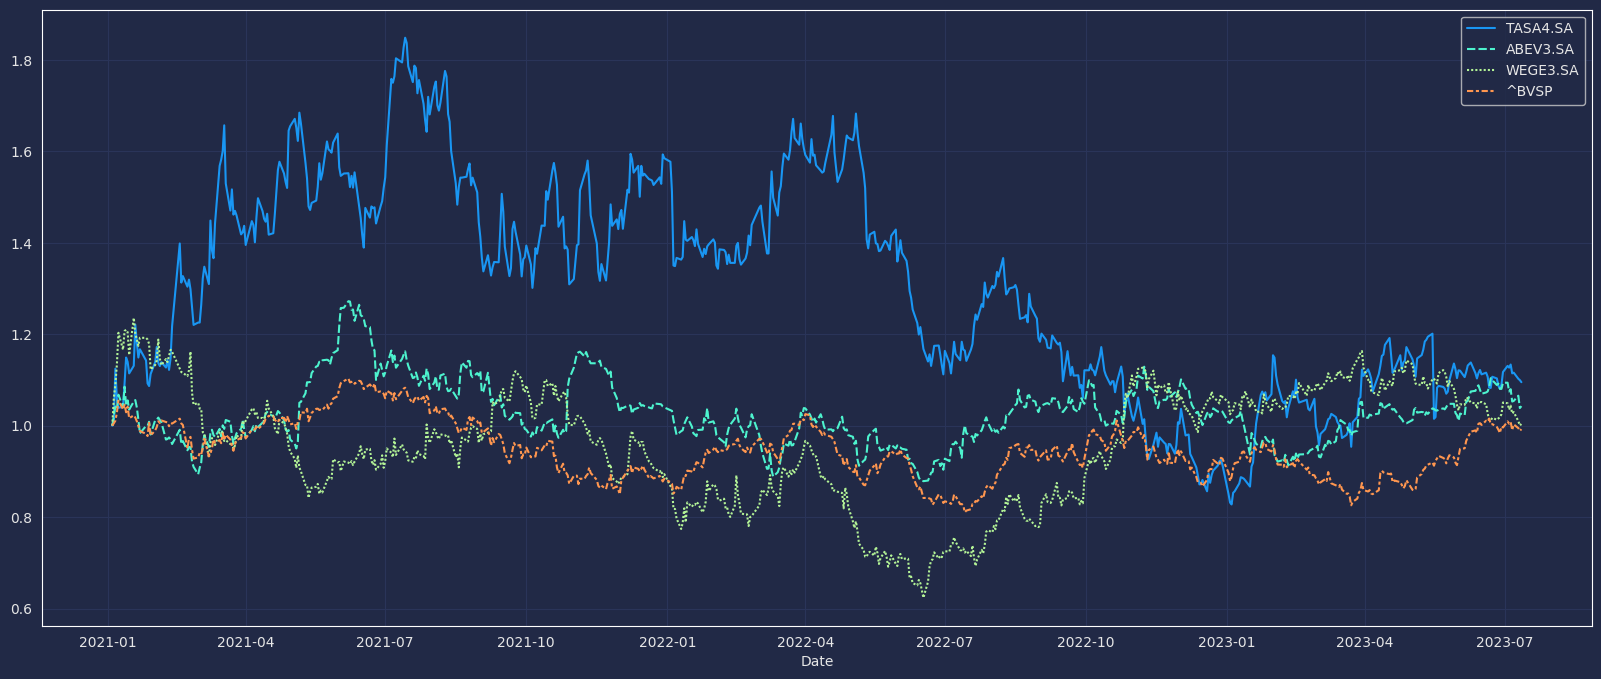

In [64]:
data_portifolio=pd.DataFrame()
for df_name in list(d.keys()):
  data_portifolio[df_name]=d[df_name]['Adj Close']

print(data_portifolio.head())
print('======================================================================================================')

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'
fig2,ax2=plt.subplots(figsize=(20,8))
ax2.grid(color='#2A3459')
ax2=sns.lineplot(data=data_portifolio,palette='rainbow')

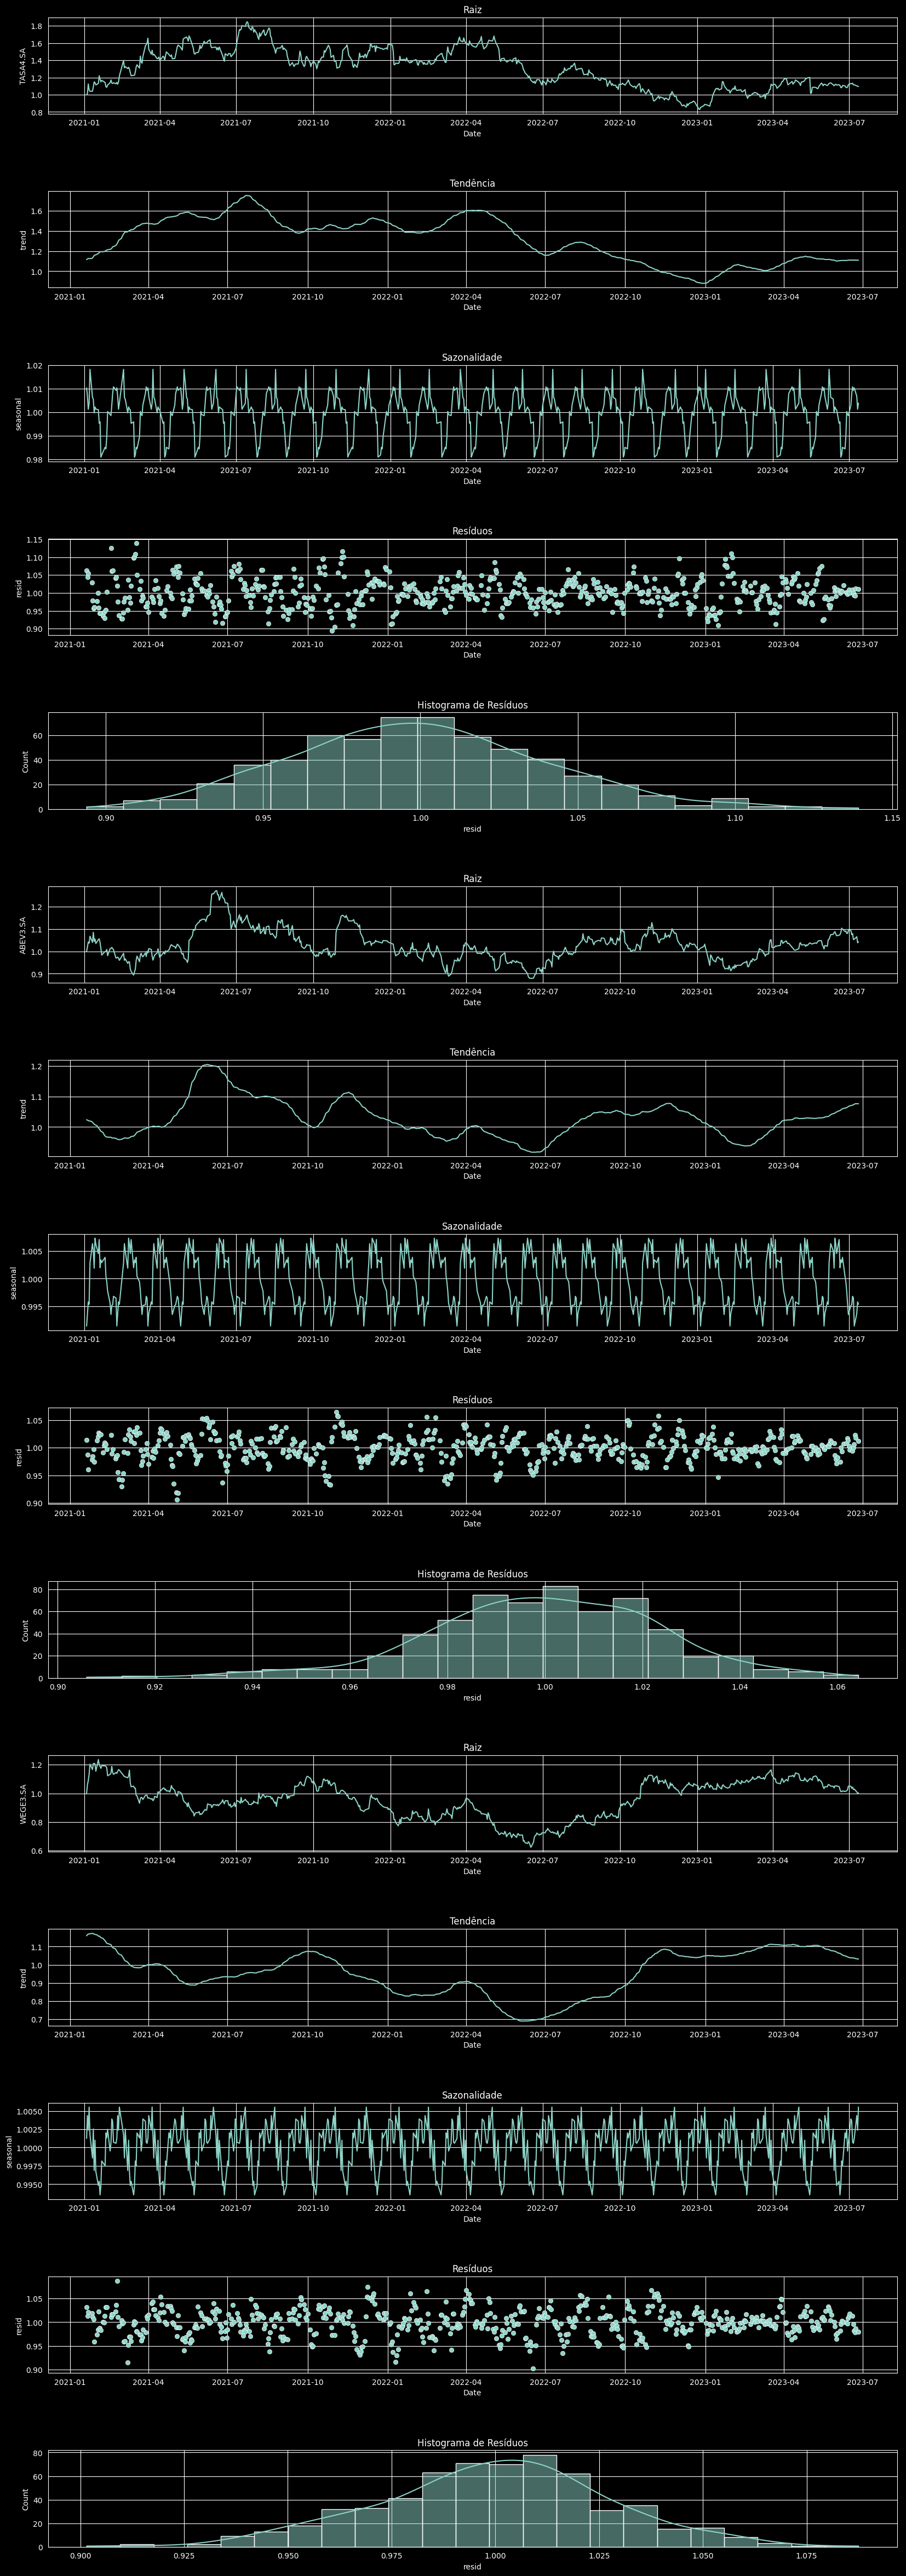

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose
data_portifolio.index =pd.to_datetime(data_portifolio.index)

fig_,axs_=plt.subplots(int(4*data_portifolio.shape[1]+data_portifolio.shape[1]),1,figsize=(20,60))
cont=0
sns.set_palette('rainbow')

for col_index in range(0,data_portifolio.shape[1]):
  series=data_portifolio.iloc[:,col_index]
  result = seasonal_decompose(series, model='multiplicative',period=25)
  sns.lineplot(data=result.observed,ax=axs_[cont])
  axs_[cont].set_title('Raiz')
  cont+=1
  sns.lineplot(data=result.trend,ax=axs_[cont])
  axs_[cont].set_title('Tendência')
  cont+=1
  sns.lineplot(data=result.seasonal,ax=axs_[cont])
  axs_[cont].set_title('Sazonalidade')
  cont+=1
  sns.scatterplot(data=result.resid,ax=axs_[cont])
  axs_[cont].set_title('Resíduos')
  cont+=1
  sns.histplot(data=result.resid,ax=axs_[cont],kde=True)
  axs_[cont].set_title('Histograma de Resíduos')
  cont+=1
plt.subplots_adjust(hspace = 0.8)
# result.resid.dropna().hist()


In [66]:
data_portifolio.index[0]

Timestamp('2021-01-04 00:00:00')

In [67]:
data_raiz={name:pd.DataFrame() for name in carteira}

for df_name in list(d.keys()):
  data_raiz[df_name] = pdr.get_data_yahoo(df_name,start=start_date,end=end)
  data_raiz[df_name]['Simple Return']=(data_raiz[df_name]['Adj Close']/data_raiz[df_name]['Adj Close'].shift(1))-1


data_zero={name:pd.DataFrame() for name in carteira}
data_acoes=pd.DataFrame()
for df_name in list(d.keys()):
  data_zero[df_name]=pdr.get_data_yahoo(df_name,start=start_date,end=end)
  data_acoes[df_name]=data_zero[df_name]['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [68]:
return_portifolio=pd.DataFrame()
for df_name in list(d.keys()):
  return_portifolio[df_name]=data_raiz[df_name]['Simple Return']

Text(0.5, 1.0, 'Distribuição de Retornos Simples')

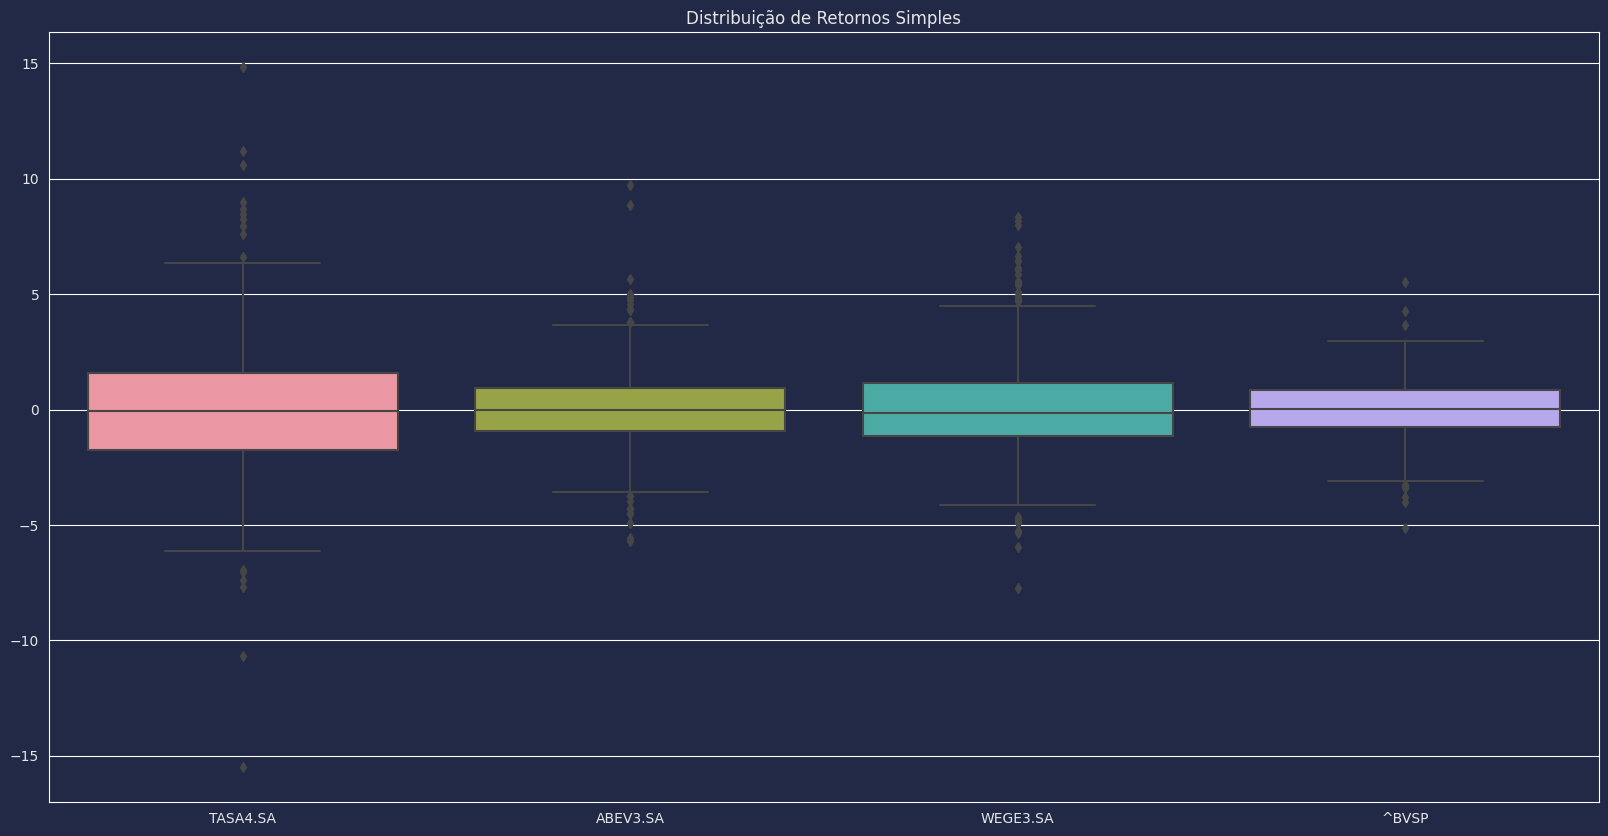

In [69]:
fig2,ax2=plt.subplots(figsize=(20,10))
sns.set_palette('Spectral',n_colors=True)

# sns.violinplot(data=return_portifolio*100)
sns.boxplot(data=return_portifolio*100)
plt.title("Distribuição de Retornos Simples")

In [70]:
#Retorno de cada ação
retornos_=return_portifolio.mean()*days*100
print("================RETORNO=================")
print(retornos_)
print("===============VOLATILIDADE=============")
print(return_portifolio.std())

retornos_[retornos_>0].index

================RETORNO=================
TASA4.SA    37.098957
ABEV3.SA    13.395559
WEGE3.SA    14.855986
^BVSP        4.748171
dtype: float64
===============VOLATILIDADE=============
TASA4.SA    0.028993
ABEV3.SA    0.016573
WEGE3.SA    0.021042
^BVSP       0.012966
dtype: float64


Index(['TASA4.SA', 'ABEV3.SA', 'WEGE3.SA', '^BVSP'], dtype='object')

In [71]:
return_portifolio.dropna().head(2)

,TASA4.SA,ABEV3.SA,WEGE3.SA,^BVSP
Date,,,,
2021-01-05,0.011568,0.021318,0.061378,0.005609
2021-01-06,0.111817,0.020240,0.026515,0.005267


In [72]:
return_portifolio=return_portifolio[carteira[:-1]]
data_portifolio=data_portifolio[carteira[:-1]]

In [73]:
pesos=np.array([1/(return_portifolio.shape[1]-1)]*return_portifolio.shape[1])

In [74]:
pesos=np.array([1/return_portifolio.shape[1]]*return_portifolio.shape[1])

In [75]:
#retorno anual médio
#anual= 250
retornos_=return_portifolio.mean()*days*100
retornos_

TASA4.SA    37.098957
ABEV3.SA    13.395559
WEGE3.SA    14.855986
dtype: float64

In [76]:
"Retorno da carteira: " + str(round(np.dot(pesos,retornos_),3))+'%'

'Retorno da carteira: 21.784%'

In [77]:
pesos2=np.array([1/return_portifolio.shape[1]]*return_portifolio.shape[1])#,0.4])
"Retorno da carteira: " + str(round(np.dot(pesos2,retornos_),3))+'%'

'Retorno da carteira: 21.784%'

<Axes: title={'center': 'PREÇO DAS AÇÕES'}>

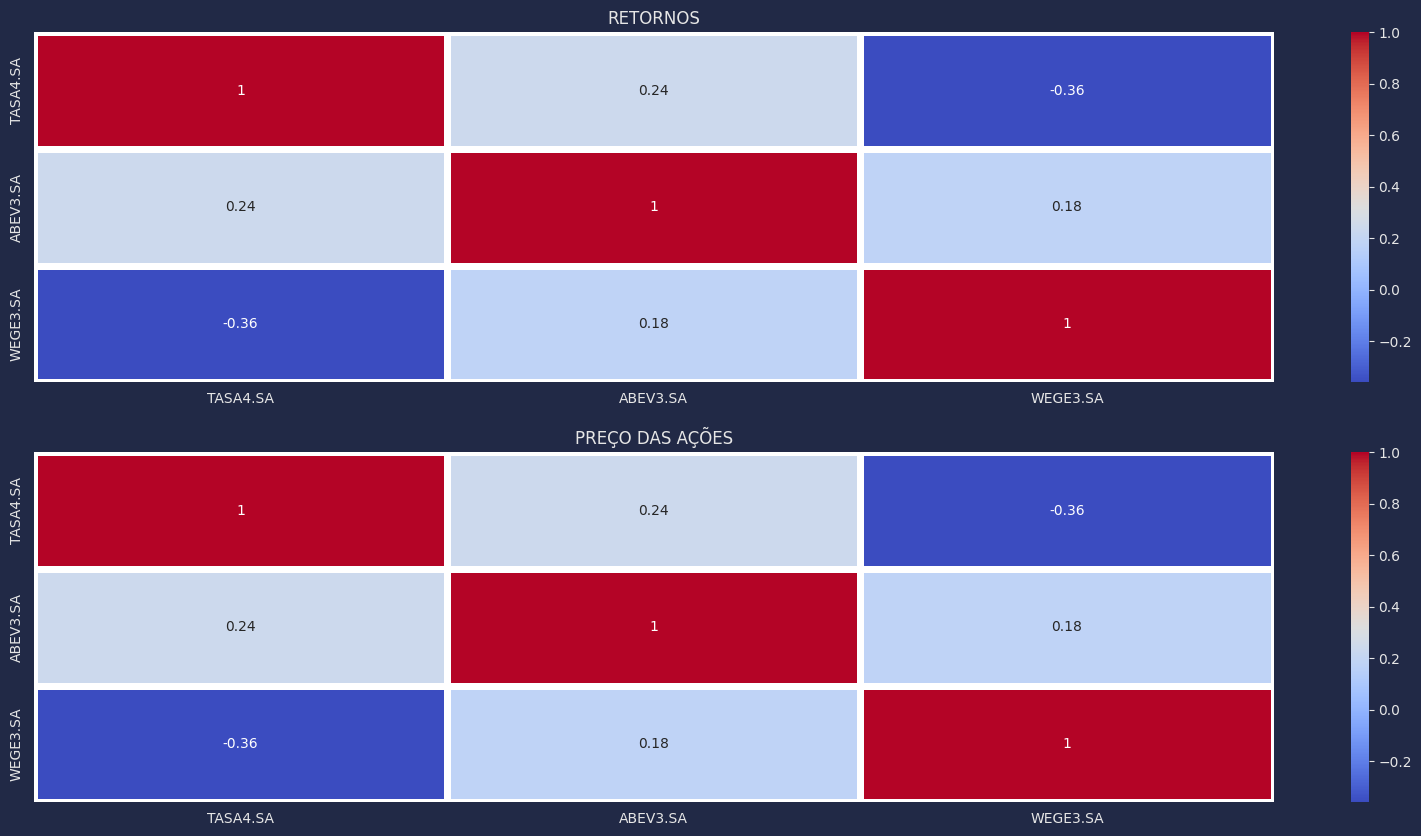

In [78]:
data_portifolio.corr()
sns.set_palette("inferno")
fig,axis=plt.subplots(2,1,figsize=(20,10))
sns.heatmap(data=data_portifolio.corr(),annot=True,cmap="coolwarm",linecolor="white",linewidths=5,ax=axis[0])
axis[0].set_title("RETORNOS")
axis[1].set_title("PREÇO DAS AÇÕES")
sns.heatmap(data=data_acoes[carteira[:-1]].corr(),annot=True,cmap="coolwarm",linecolor="white",linewidths=5,ax=axis[1])

In [79]:
#calculo de volatilidade da carteira
pesos=np.array([1/return_portifolio.shape[1]]*return_portifolio.shape[1])#0.4])
volat=np.dot(pesos.T,np.dot(data_portifolio.cov()*days,pesos))**0.5
volat

2.1693649106281727

In [80]:
#volatilidade da bolsa
dados=data_raiz['^BVSP']['Adj Close']/data_raiz['^BVSP']['Adj Close'].iloc[0]
volatilidade_GSPC=dados.std()*np.sqrt(days)
volatilidade_GSPC

1.6146611954233936

### Fronteira de Markowitiz

In [81]:
#dados
data_acoes=data_acoes[carteira[:-1]]

In [82]:
data_log_return=np.log(data_acoes/data_acoes.shift(1))
data_log_return

,TASA4.SA,ABEV3.SA,WEGE3.SA
Date,,,
2021-01-04,NaN,NaN,NaN
2021-01-05,0.011502,0.021094,0.059568
2021-01-06,0.105996,0.020038,0.026170
2021-01-07,-0.061875,-0.004972,0.040497
2021-01-08,-0.017168,0.029468,0.058719
...,...,...,...
2023-07-06,-0.017151,-0.025301,-0.016400
2023-07-07,0.001330,0.001348,0.002977
2023-07-10,-0.012032,0.010717,-0.019376


In [83]:
#retorno anual
data_log_return.mean()*days

TASA4.SA    0.095432
ABEV3.SA    0.044079
WEGE3.SA    0.003865
dtype: float64

,TASA4.SA,ABEV3.SA,WEGE3.SA
TASA4.SA,1.000000,0.203953,0.158048
ABEV3.SA,0.203953,1.000000,0.315933
WEGE3.SA,0.158048,0.315933,1.000000


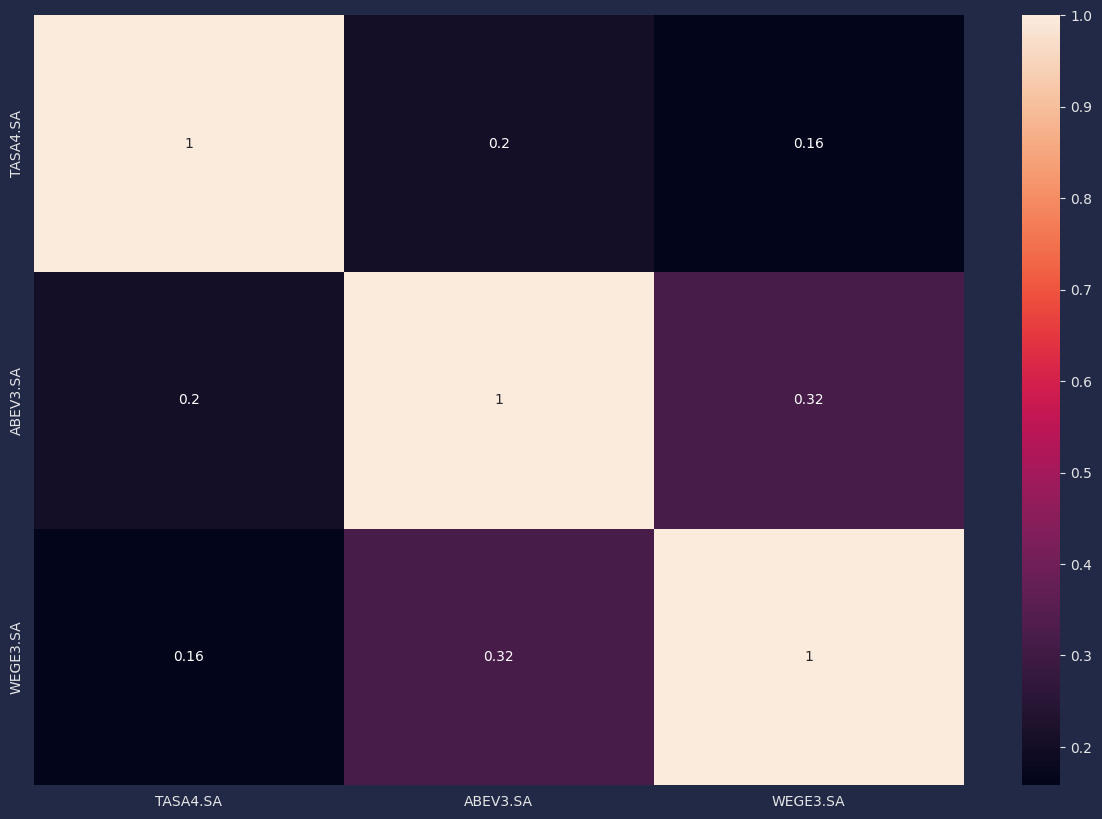

In [84]:
fig,axs=plt.subplots(figsize=(15,10))
sns.heatmap(data_log_return.corr(),annot=True)
data_log_return.corr()

In [85]:
combinacoes_pesos=1000


weights_matrix=np.zeros((combinacoes_pesos,pesos.shape[0]))
for i in range(0,combinacoes_pesos):
  number_random=np.random.random(pesos.shape[0])
  number_random/=sum(number_random)
  weights_matrix[i][:]=number_random

##          **Portifolio return**


In [86]:
print(data_log_return.mean())
means_=np.array(data_log_return[return_portifolio.columns.tolist()].mean())
means_

TASA4.SA    0.000145
ABEV3.SA    0.000067
WEGE3.SA    0.000006
dtype: float64


array([1.44813875e-04, 6.68879651e-05, 5.86481110e-06])

In [87]:
retornos_=np.dot(weights_matrix,means_)*days

##         **Portifolio Variance**

In [88]:
variance=np.zeros((combinacoes_pesos,1))
for i in range(0, combinacoes_pesos):
  variance[i][:]=np.dot(weights_matrix[i][:],np.dot(data_log_return.cov()*days,\
                                      weights_matrix[i][:].T))

In [89]:
#like desvio padrao
volatilidade=np.sqrt(variance)

<ipython-input-90-8f458e7ee847>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='Volatilidade', ylabel='Retorno'>

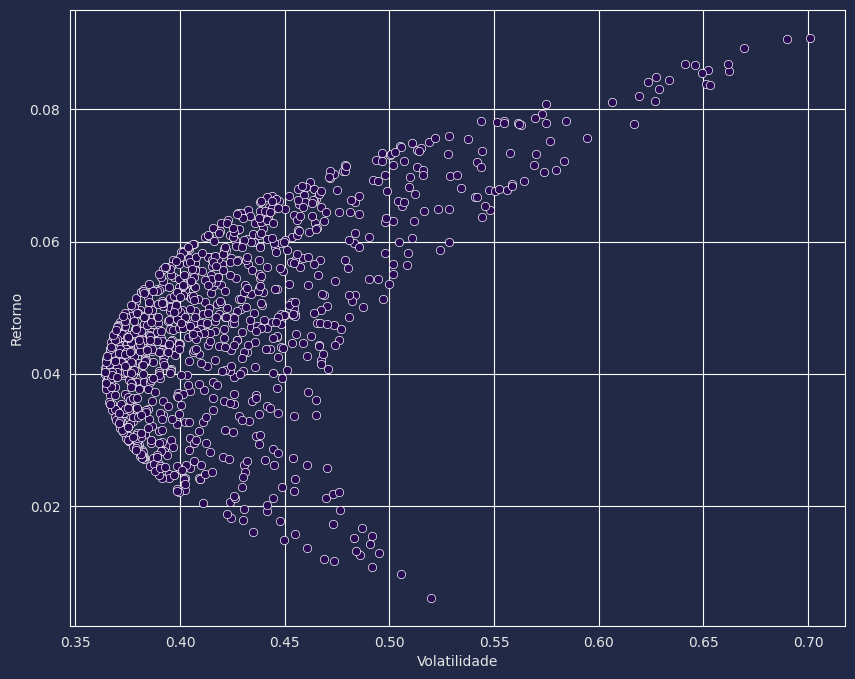

In [90]:
df=pd.DataFrame()
df['Volatilidade']=volatilidade.reshape(1,-1)[0]
df['Retorno']=retornos_

#df.plot(x="Volatilidade",y='Retorno', kind="scatter",figsize=(10,6))
plt.subplots(figsize=(10,8))
plt.style.use("dark_background")
sns.scatterplot(x=df['Volatilidade'],y=df['Retorno'], palette='inferno')

In [91]:
weights_matrix[[df[(df["Retorno"]>0.05)&(df['Volatilidade']<0.20)].index]].round(2)

<ipython-input-91-07be4e923207>:1: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



array([], shape=(0, 3), dtype=float64)

In [92]:
data_pesos=pd.concat([df,pd.DataFrame(weights_matrix, columns=carteira[:-1])],axis=1)

In [93]:
import plotly.express as px
px.scatter(data_pesos,x='Volatilidade',y='Retorno',hover_data=carteira[:-1],template = "plotly_dark",title='Fronteira de Markovitz')

In [96]:
data_pesos[(data_pesos['Volatilidade']<0.56)&(data_pesos['Retorno']>0.05)]

writer = pd.ExcelWriter('Fronteira_Markowitz_.xlsx', engine='xlsxwriter')
data_pesos[(data_pesos['Volatilidade']<0.56)&(data_pesos['Retorno']>0.05)].to_excel(writer,sheet_name='1',index=False)
writer.save()
from google.colab import files
files.download('Fronteira_Markowitz_.xlsx')

<ipython-input-96-e0347805ab11>:5: FutureWarning:

save is not part of the public API, usage can give unexpected results and will be removed in a future version



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>